In [32]:
from deepface import DeepFace
import pandas as pd
import seaborn as sns
import numpy as np
from pathlib import Path
from shutil import copyfile
from tqdm.notebook import tqdm
import itertools
from tqdm.notebook import tqdm
import numpy as np
import random
import cv2
from typing import Literal
import json

tqdm.pandas()

from sklearn.model_selection import train_test_split


SEED = 254279

np.random.seed(SEED)
random.seed(SEED)

narysuj krzywe FAR,
FRR,
wyznacz EER
narysuj ROC


zmierz PSNR,
SSIM oraz BRISQUE.

In [33]:
identity_df = pd.read_csv("./data/face/identity_align_CelebA.txt", sep=" ", header=None, names=["image", "identity"])
identity_df

,image,identity
0,000001.png,2880
1,000002.png,2937
2,000003.png,8692
3,000004.png,5805
4,000005.png,9295
...,...,...
202594,202595.png,9761
202595,202596.png,7192
202596,202597.png,9852
202597,202598.png,5570


<Axes: xlabel='Count', ylabel='identity'>

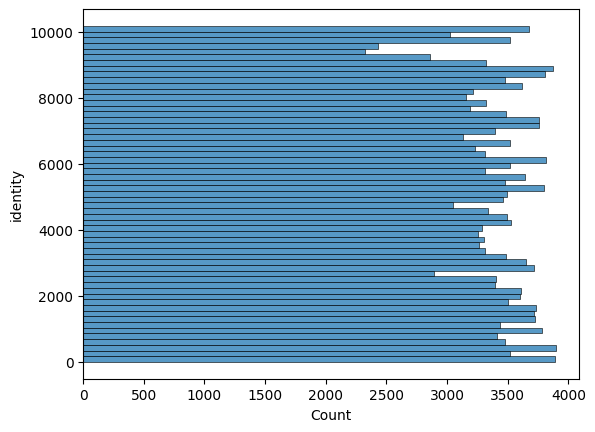

In [34]:
sns.histplot(
    data=identity_df,
    y="identity",
)

In [35]:
random_identities = np.random.choice(identity_df["identity"].unique(), 80)

In [36]:
random_identities

array([ 2159,  8455,   229,  5736,  7803,  7915,  4568,  9535,   902,
        3004,  1004,  2729,  5846,  4754,  1051,  4055,  1295,  2939,
        6129,  4638,  3984, 10053,  3669,  6906,  6069,  5787,   303,
        7450,  1433,  4463,  3670,  5792,  3736,  1567,  7173,   172,
        3716,  5841,  6258,  4544,  1308,   910,   298,  2935, 10038,
        1673,  1337,   612,  1824,   871,  6107,    97,  9625,  5236,
         736,   478,  1663,  4550,  8051,  3742,  4367,  8802,  2339,
          15,  7831,  9273,  9886,  9066,  7804,  8650,  5402,  4896,
        9433,   898,  6074,  6891,  4664,  6997,  5013,  4570])

In [37]:
dataset_df = identity_df[identity_df["identity"].isin(random_identities)]
dataset_df['image'] = dataset_df['image']
dataset_df

,image,identity
9,000010.png,612
27,000028.png,3670
142,000143.png,5787
215,000216.png,4664
360,000361.png,9886
...,...,...
201334,201335.png,6258
201506,201507.png,6074
202085,202086.png,5013
202141,202142.png,5013


In [38]:
IMAGES_DIR = Path("./data/img/")
# MODEL = "VGG-Face"
MODEL = "Facenet"
# USER_DB_PATH = Path("./data/user_db.pkl")
USER_DB_PATH = Path("./data/user_db_facenet.pkl")

In [45]:
registration_df = dataset_df.groupby("identity").sample(1, random_state=SEED).reset_index(drop=True)
mac_jed = pd.DataFrame({"image": ['mac1.jpg', 'jed1.jpg'], "identity": [1,2]})
registration_df = pd.concat([registration_df, mac_jed], ignore_index=True)
registration_df.to_csv("./data/face/registration.csv", index=False)

registration_df = pd.read_csv("./data/face/registration.csv")

registration_df

,image,identity
0,050987.png,15
1,180629.png,97
2,108845.png,172
3,163175.png,229
4,165766.png,298
...,...,...
75,022376.png,9535
76,061873.png,9625
77,053384.png,9886
78,129996.png,10038


In [73]:
registration_df

,image,identity
0,050987.png,15
1,180629.png,97
2,108845.png,172
3,163175.png,229
4,165766.png,298
...,...,...
77,053384.png,9886
78,129996.png,10038
79,158237.png,10053
80,mac1.jpg,1


In [48]:
from users_db import UsersDB

In [49]:
db = UsersDB(model=MODEL)

In [50]:
for index, row in registration_df.iterrows():
    img_fpath = IMAGES_DIR / row["image"]
    db.add_record(row["identity"], img_fpath)

Pomyślnie dodano nową osobe id_=15 :) 
Pomyślnie dodano nową osobe id_=97 :) 
Pomyślnie dodano nową osobe id_=172 :) 
Pomyślnie dodano nową osobe id_=229 :) 
Pomyślnie dodano nową osobe id_=298 :) 
Pomyślnie dodano nową osobe id_=303 :) 
Pomyślnie dodano nową osobe id_=478 :) 
Pomyślnie dodano nową osobe id_=612 :) 
Pomyślnie dodano nową osobe id_=736 :) 
Pomyślnie dodano nową osobe id_=871 :) 
Pomyślnie dodano nową osobe id_=898 :) 
Pomyślnie dodano nową osobe id_=902 :) 
Pomyślnie dodano nową osobe id_=910 :) 
Pomyślnie dodano nową osobe id_=1004 :) 
Pomyślnie dodano nową osobe id_=1051 :) 
Pomyślnie dodano nową osobe id_=1295 :) 
Pomyślnie dodano nową osobe id_=1308 :) 
Pomyślnie dodano nową osobe id_=1337 :) 
Pomyślnie dodano nową osobe id_=1433 :) 
Pomyślnie dodano nową osobe id_=1567 :) 
Pomyślnie dodano nową osobe id_=1663 :) 
Pomyślnie dodano nową osobe id_=1673 :) 
Pomyślnie dodano nową osobe id_=1824 :) 
Pomyślnie dodano nową osobe id_=2159 :) 
Pomyślnie dodano nową osobe id_

In [51]:
db.save_db(USER_DB_PATH)

In [54]:
df_wthout_registration = dataset_df[~dataset_df["image"].isin(registration_df["image"])]
df_wthout_registration["truth"] = True
df_wthout_registration

,image,identity,truth
9,000010.png,612,True
27,000028.png,3670,True
142,000143.png,5787,True
215,000216.png,4664,True
360,000361.png,9886,True
...,...,...,...
201334,201335.png,6258,True
201506,201507.png,6074,True
202085,202086.png,5013,True
202141,202142.png,5013,True


In [55]:
mac_jed_wthout_registration= pd.DataFrame({"image": ['mac2.jpg', 'jed2.jpg', 'mac3.jpg', 'jed3.jpg', 'mac4.jpg', 'jed4.jpg'], 
                                           "identity": [1,2,1,2,1,2], 
                                           'truth': [True,True,True,True,True,True]})
df_wthout_registration = pd.concat([df_wthout_registration, mac_jed_wthout_registration], ignore_index=True)
df_wthout_registration

,image,identity,truth
0,000010.png,612,True
1,000028.png,3670,True
2,000143.png,5787,True
3,000216.png,4664,True
4,000361.png,9886,True
...,...,...,...
1347,jed2.jpg,2,True
1348,mac3.jpg,1,True
1349,jed3.jpg,2,True
1350,mac4.jpg,1,True


In [57]:
n = 676

fake_identities = df_wthout_registration[:n].copy()

identities_2half = df_wthout_registration[n:2*n]["identity"].tolist()
random.shuffle(identities_2half)

fake_identities["fake_identity"] = identities_2half
fake_identities["truth"] = fake_identities["fake_identity"] == fake_identities["identity"]
fake_identities = fake_identities[fake_identities["truth"] == False].copy()

fake_identities.to_csv("./data/fake_identities.csv", index=False)

fake_identities = pd.read_csv("./data/fake_identities.csv")

fake_identities

,image,identity,truth,fake_identity
0,000010.png,612,False,229
1,000028.png,3670,False,5841
2,000143.png,5787,False,3984
3,000216.png,4664,False,2729
4,000361.png,9886,False,6997
...,...,...,...,...
664,099640.png,898,False,9535
665,099791.png,5792,False,1673
666,099963.png,4463,False,3669
667,100197.png,7804,False,229


In [58]:
fake_identities.truth.sum()

0

In [83]:
df1 = fake_identities.drop(columns=["identity"]).rename(columns={"fake_identity": "identity"})
df1 = pd.concat([
    df1,
    df_wthout_registration[n:2*n]
])
df1.to_csv("./data/df1.csv", index=False)
df1

,image,truth,identity
0,000010.png,False,229
1,000028.png,False,5841
2,000143.png,False,3984
3,000216.png,False,2729
4,000361.png,False,6997
...,...,...,...
1347,jed2.jpg,True,2
1348,mac3.jpg,True,1
1349,jed3.jpg,True,2
1350,mac4.jpg,True,1


In [84]:
registered_identities = registration_df["identity"].tolist()

new_users_df = identity_df[~identity_df["identity"].isin(registered_identities)].sample(100, random_state=SEED)

new_fake_id_list = df1.sample(100, random_state=SEED)["identity"].tolist()

new_users_df["identity"] = new_fake_id_list
new_users_df["truth"] = False

new_users_df.to_csv("./data/new_users.csv", index=False)

new_users_df = pd.read_csv("./data/new_users.csv")

new_users_df

,image,identity,truth
0,019090.png,612,False
1,003688.png,7915,False
2,000252.png,5846,False
3,093747.png,871,False
4,140629.png,8802,False
...,...,...,...
95,069067.png,97,False
96,198663.png,9433,False
97,097141.png,1673,False
98,107380.png,4896,False


In [85]:
df2 = pd.concat([df1, new_users_df])
df2.to_csv("./data/df2.csv", index=False)
df2

,image,truth,identity
0,000010.png,False,229
1,000028.png,False,5841
2,000143.png,False,3984
3,000216.png,False,2729
4,000361.png,False,6997
...,...,...,...
95,069067.png,False,97
96,198663.png,False,9433
97,097141.png,False,1673
98,107380.png,False,4896


In [86]:
df3 = pd.concat([
    df1[:150].copy(),
    df1[-150:].copy(),
])

df3.to_csv("./data/df3.csv", index=False)
df3 = pd.read_csv("./data/df3.csv")

df3

,image,truth,identity
0,000010.png,False,229
1,000028.png,False,5841
2,000143.png,False,3984
3,000216.png,False,2729
4,000361.png,False,6997
...,...,...,...
295,jed2.jpg,True,2
296,mac3.jpg,True,1
297,jed3.jpg,True,2
298,mac4.jpg,True,1


In [88]:
used_img_fnames = []

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_sigma(psnr, max_i=255):
    """
    Calculate the standard deviation of the Gaussian noise to achieve a given PSNR.
    
    :param psnr: Desired PSNR level in dB.
    :param max_i: Maximum possible pixel value of the image.
    :return: Standard deviation of the Gaussian noise.
    """
    mse = max_i**2 / (10**(psnr / 10))
    sigma = np.sqrt(mse)
    return sigma

def add_gaussian_noise(image, sigma):
    """
    Add Gaussian noise to an image with a specified standard deviation.
    
    :param image: Original image.
    :param sigma: Standard deviation of the Gaussian noise.
    :return: Noisy image.
    """
    gauss = np.random.normal(0, sigma, image.shape)
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip the values to maintain valid pixel range
    return noisy_image.astype(np.uint8)


PSNR_VALUES = [70, 45, 35, 25, 15]
for psnr in tqdm(PSNR_VALUES):
    for img_name in df3["image"]:
        image = cv2.imread(str(IMAGES_DIR / img_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        noisy_image = add_gaussian_noise(image, calculate_sigma(psnr))
        noisy_img_fpath = Path(f"./data/df3_psnr{psnr}db/{img_name}")
        noisy_img_fpath.parent.mkdir(exist_ok=True, parents=True)
        cv2.imwrite(str(noisy_img_fpath), cv2.cvtColor(noisy_image, cv2.COLOR_RGB2BGR))
        used_img_fnames.append(str(noisy_img_fpath))


  0%|          | 0/5 [00:00<?, ?it/s]

In [90]:
def scale_luminance(image, fashion: Literal["quad", "linear", "constant"], linear_factor=None, constant=None):

    image_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    y, u, v = cv2.split(image_yuv)
    if fashion == "quad":
        y = cv2.pow(y, 2)
    elif fashion == "linear" and linear_factor is not None:
        y = cv2.addWeighted(y, linear_factor, np.zeros_like(y), 0, 0)
    elif fashion == "constant" and constant is not None:
        y = cv2.add(y, constant)


    y = np.clip(y, 0, 255)
    image_yuv = cv2.merge([y, u, v])
    image_rgb_scaled = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

    return image_rgb_scaled.astype(image.dtype)
df4 = df3.copy()
df4.to_csv("./data/df4.csv", index=False)
df4 = pd.read_csv("./data/df4.csv")

for img_name in tqdm(df4["image"], desc="Scaling luminance quadratically"):
    image = cv2.imread(str(IMAGES_DIR / img_name))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    lum_quad_image = scale_luminance(image, fashion="quad")
    lum_quad_image_fpath = Path(f"./data/df4_luminance_quad/{img_name}")
    lum_quad_image_fpath.parent.mkdir(exist_ok=True, parents=True)
    cv2.imwrite(str(lum_quad_image_fpath), cv2.cvtColor(lum_quad_image, cv2.COLOR_RGB2BGR))
    used_img_fnames.append(str(lum_quad_image_fpath))

Scaling luminance quadratically:   0%|          | 0/300 [00:00<?, ?it/s]

In [91]:
LUM_LINEAR_FACTOR_VALUES = [1/2, 3/5, 3/4, 4/3, 3/2]
for factor in tqdm(LUM_LINEAR_FACTOR_VALUES, desc="Scaling luminance linearly"):
    for img_name in tqdm(df4["image"], desc=f"factor={factor}", leave=False, position=1):
        image = cv2.imread(str(IMAGES_DIR / img_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        lum_linear_image = scale_luminance(image, fashion="linear", linear_factor=factor)
        factor_str_safe = str(round(factor, 2)).replace(".", "f")
        lum_linear_image_fpath = Path(f"./data/df4_luminance_linear_{factor_str_safe}/{img_name}")
        lum_linear_image_fpath.parent.mkdir(exist_ok=True, parents=True)
        cv2.imwrite(str(lum_linear_image_fpath), cv2.cvtColor(lum_linear_image, cv2.COLOR_RGB2BGR))
        used_img_fnames.append(str(lum_linear_image_fpath))

Scaling luminance linearly:   0%|          | 0/5 [00:00<?, ?it/s]

factor=0.5:   0%|          | 0/300 [00:00<?, ?it/s]

factor=0.6:   0%|          | 0/300 [00:00<?, ?it/s]

factor=0.75:   0%|          | 0/300 [00:00<?, ?it/s]

factor=1.3333333333333333:   0%|          | 0/300 [00:00<?, ?it/s]

factor=1.5:   0%|          | 0/300 [00:00<?, ?it/s]

In [92]:
LUM_CONSTANT_VALUES = [-100, -20, -10, 30]
for constant in tqdm(LUM_CONSTANT_VALUES, desc="Scaling luminance by constant"):
    for img_name in tqdm(df4["image"], desc=f"constant={constant}", leave=False, position=1):
        image = cv2.imread(str(IMAGES_DIR / img_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        lum_const_image = scale_luminance(image, fashion="constant", constant=constant)
        const_str_safe = str(constant).replace("-", "neg")
        lum_const_image_fpath = Path(f"./data/df4_luminance_const_{const_str_safe}/{img_name}")
        lum_const_image_fpath.parent.mkdir(exist_ok=True, parents=True)
        cv2.imwrite(str(lum_const_image_fpath), cv2.cvtColor(lum_const_image, cv2.COLOR_RGB2BGR))
        used_img_fnames.append(str(lum_const_image_fpath))

Scaling luminance by constant:   0%|          | 0/4 [00:00<?, ?it/s]

constant=-100:   0%|          | 0/300 [00:00<?, ?it/s]

constant=-20:   0%|          | 0/300 [00:00<?, ?it/s]

constant=-10:   0%|          | 0/300 [00:00<?, ?it/s]

constant=30:   0%|          | 0/300 [00:00<?, ?it/s]

In [97]:
len(used_img_fnames)

7390

In [98]:
EXP_IMG_EMBEDDINGS_FPATH = Path("./data/exp_img_embeddings.json")

used_img_fnames_df1_df2 = [
    str(IMAGES_DIR /Path(img_fpath).name)
    for img_fpath in set(pd.concat([df1, df2])["image"])
]

print(used_img_fnames_df1_df2[0])
# used_img_fnames.extend(used_img_fnames_df1_df2)
print(f"Used images: {len(used_img_fnames)}")
exp_img_embeddings = {
    db.model: {
        img_fname: db.get_img_embedding(img_fname)
        for img_fname in tqdm(used_img_fnames, desc="Calculating embeddings")
    }
}

with open(EXP_IMG_EMBEDDINGS_FPATH, "w") as f:
    json.dump(exp_img_embeddings, f, indent=2)

data/img/071046.png
Used images: 7390


Calculating embeddings:   0%|          | 0/7390 [00:00<?, ?it/s]

In [99]:
len(exp_img_embeddings['Facenet'].keys())

5945